K-MEANS CLUSTERING

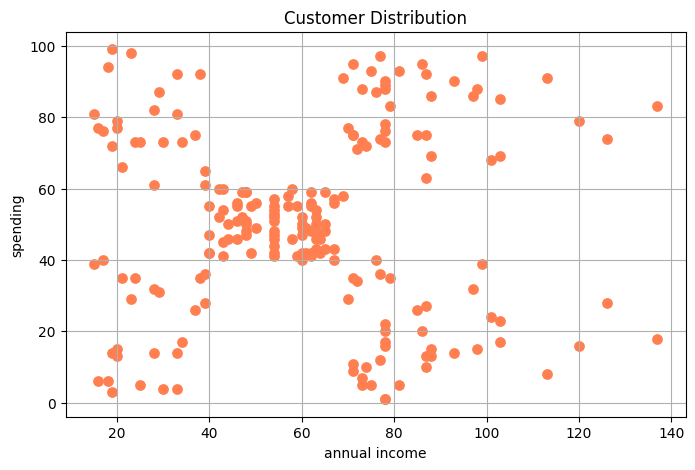

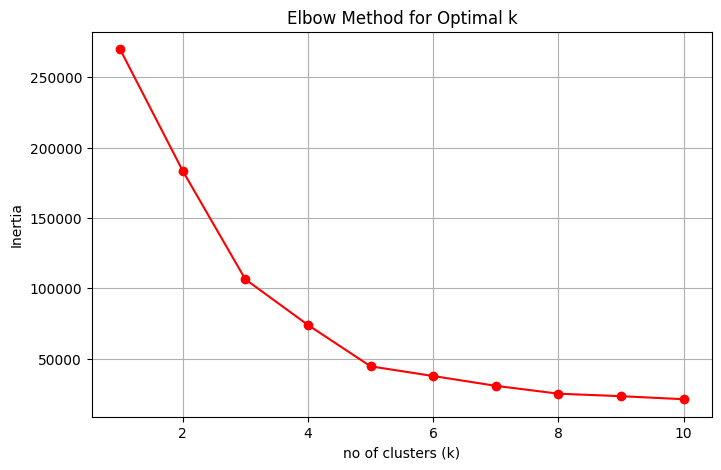

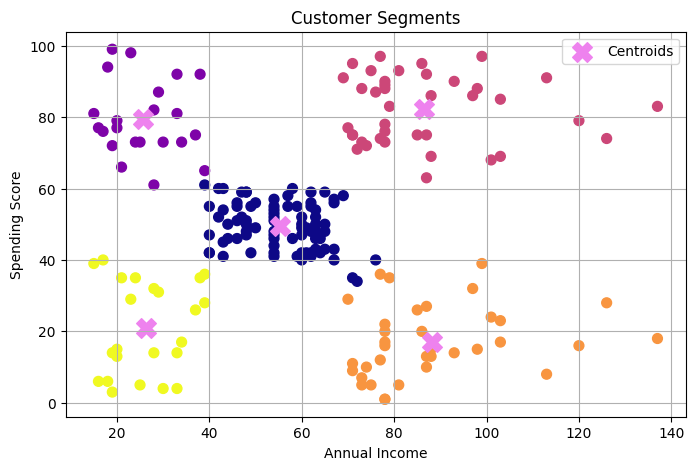

Silhouette Score for k=5 :0.55


In [19]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#load dataset
df=pd.read_csv("Mall_Customers.csv")
X=df[['annual income','spending']]
#visualize raw data
plt.figure(figsize=(8,5))
plt.scatter(X['annual income'], X['spending'],c='coral',s=45)
plt.title('Customer Distribution')
plt.xlabel('annual income')
plt.ylabel('spending')
plt.grid(True)
plt.show()
#elbow Method to find the optimal no of clusters
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=50)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
#plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K,inertia,'ro-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('no of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
#KMeans model with optimal k
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=50)
labels=kmeans.fit_predict(X)
df['Cluster']=labels
#visualize the clusters
plt.figure(figsize=(8,5))
plt.scatter(X['annual income'],X['spending'],c=labels,cmap='plasma',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='violet',marker='X',s=200,label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()
#evaluate clustering with Silhouette Score
sil_score=silhouette_score(X,labels)
print(f"Silhouette Score for k={optimal_k} :{sil_score:.2f}")
